#### Project 3: Reddit NLP
#### Corey J Sinnott
# Data Visualization and Further EDA

## Executive Summary

This report was commissioned to perform natural language processing (NLP) and analysis on two subreddits of Reddit.com. Data includes over 8000 posts, 4000 belonging to r/AskALiberal, and 4000 belonging to r/AskAConservative. The problem statement was defined as, can we classify to which subreddit a post belongs? After in-depth analysis, conclusions and recommendations will be presented.

*See model_classification_exec_summary.ipynb for the full summary, data dictionary, and findings.*

## Contents:
- [Feature Engineering](#Feature-Engineering)
- [Data Visualization](#Data-Visualization)

#### Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import language_tool_python
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import Blobber
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Feature Engineering
 - Creating new features for both analysis and visualization.

In [4]:
df = pd.read_csv('./data/full_pull_4000_each_incl_self_text.csv')

In [5]:
df = df.drop(columns = ['Unnamed: 0'])

In [6]:
df = df.drop_duplicates()

In [7]:
#dropping nulls for now; will most likely use all titles for further exploration later
df = df.dropna()

In [8]:
#creating new columns for status length and word count
df['post_length'] = [len(i) for i in df['selftext']]
df['post_word_count'] = [len(i.split()) for i in df['selftext']]
df['title_length'] = [len(i) for i in df['title']]
df['title_word_count'] = [len(i.split()) for i in df['title']]

In [9]:
# separating for simpler EDA
df_lib = df[df.subreddit == 'AskALiberal']


In [10]:
df_cons = df[df.subreddit == 'askaconservative']


In [11]:
# testing grammar evaluation tool
# https://github.com/jxmorris12/language_tool_python
tool = language_tool_python.LanguageTool('en-US')
text = 'This are bad.'
matches = tool.check(text)
len(matches)

2

In [12]:
def grammarater (source_1, source_2, samples):
    count_1 = 0
    count_2 = 0
    
    for i in source_1:
        while count_1 <= samples:           
            errors_1 = tool.check(i)
            error_rate_1 = (len(errors_1) / len(i)) * 100
            count_1 += 1
    print(f'{source_1} total errors: {errors_1}')
    print(f'{source_1} has an error rate of {error_rate_1}')
          
    for x in source_2:
        while count_2 <= samples:            
            errors_2 = tool.check(x)
            error_rate_2 = len(errors_2) / len(x)
            count_2 += 1
    print(f'{source_2} total errors: {errors_2}')
    print(f'{source_2} has an error rate of {error_rate_2}')

In [13]:
df['grammar_errors'] = [tool.check(i) for i in df['selftext']]

In [14]:
df['num_of_grammar_errors'] = [len(i) for i in df['grammar_errors']]

In [15]:
df = df.drop(columns = ['grammar_errors'])

In [165]:
df['gramm_err_rate'] = df.num_of_grammar_errors / len(df.num_of_grammar_errors) * 100

In [ ]:
df_lib['gramm_err_rate'] = df.num_of_grammar_errors / len(df.num_of_grammar_errors) * 100
df_cons['gramm_err_rate'] = df.num_of_grammar_errors / len(df.num_of_grammar_errors) * 100

In [16]:
df['selftext_polarity'] = [TextBlob(i).polarity for i in df['selftext']]

In [17]:
df['selftext_subjectivity'] = [TextBlob(i).subjectivity for i in df['selftext']]

In [18]:
lib_pol = df[df['subreddit'] == 'AskALiberal']['selftext_polarity'].mean()

In [19]:
lib_sub = df[df['subreddit'] == 'AskALiberal']['selftext_subjectivity'].mean()

In [20]:
con_pol = df[df['subreddit'] == 'askaconservative']['selftext_polarity'].mean()

In [21]:
con_sub = df[df['subreddit'] == 'askaconservative']['selftext_subjectivity'].mean()

In [37]:
cvzr = CountVectorizer(stop_words='english', max_features=200)

In [42]:
df_lib = df[df.subreddit == 'AskALiberal']
df_cons = df[df.subreddit == 'askaconservative']

In [80]:
df_lib_trim = df_lib[df_lib.post_length <= 2100]
df_cons_trim = df_cons[df_cons.post_length <= 2100]

In [86]:
df_lib_trim = df_lib[df_lib.selftext_polarity > 0]
df_cons_trim = df_cons[df_cons.selftext_polarity > 0]
df_lib_trim = df_lib[df_lib.selftext_subjectivity > 0]
df_cons_trim = df_cons[df_cons.selftext_subjectivity > 0]

In [43]:
self_text_lib = cvzr.fit_transform(df_lib['selftext'])
title_text_lib = cvzr.fit_transform(df_lib['title'])
self_text_cons = cvzr.fit_transform(df_cons['selftext'])
title_text_cons = cvzr.fit_transform(df_cons['title'])

In [46]:
self_text_lib = pd.DataFrame(self_text_lib.toarray(), columns = cvzr.get_feature_names())
title_text_lib = pd.DataFrame(title_text_lib.toarray(), columns = cvzr.get_feature_names())
self_text_cons = pd.DataFrame(self_text_cons.toarray(), columns = cvzr.get_feature_names())
title_text_cons = pd.DataFrame(title_text_cons.toarray(), columns = cvzr.get_feature_names())

In [129]:
# askaliberal bigrams
cvzr_bi = CountVectorizer(stop_words='english', max_features=200, ngram_range=(2,2))

self_text_lib_bigrams = cvzr_bi.fit_transform(df_lib['selftext'])
self_text_lib_bigrams = pd.DataFrame(self_text_lib_bigrams.toarray(), columns = cvzr_bi.get_feature_names())

title_text_lib_bigrams = cvzr_bi.fit_transform(df_lib['title'])
title_text_lib_bigrams = pd.DataFrame(title_text_lib_bigrams.toarray(), columns = cvzr_bi.get_feature_names())

In [130]:
# askaconservative bigrams
cvzr_bi = CountVectorizer(stop_words='english', max_features=200, ngram_range=(2,2))

self_text_cons_bigrams = cvzr_bi.fit_transform(df_cons['selftext'])
self_text_cons_bigrams = pd.DataFrame(self_text_cons_bigrams.toarray(), columns = cvzr_bi.get_feature_names())

title_text_cons_bigrams = cvzr_bi.fit_transform(df_cons['title'])
title_text_cons_bigrams = pd.DataFrame(title_text_cons_bigrams.toarray(), columns = cvzr_bi.get_feature_names())

In [131]:
# askaliberal trigrams
cvzr_tri = CountVectorizer(stop_words='english', max_features=200, ngram_range=(3,3))

self_text_lib_trigrams = cvzr_tri.fit_transform(df_lib['selftext'])
self_text_lib_trigrams = pd.DataFrame(self_text_lib_trigrams.toarray(), columns = cvzr_tri.get_feature_names())

title_text_lib_trigrams = cvzr_tri.fit_transform(df_lib['title'])
title_text_lib_trigrams = pd.DataFrame(title_text_lib_trigrams.toarray(), columns = cvzr_tri.get_feature_names())

In [132]:
# askaconservative trigrams
cvzr_tri = CountVectorizer(stop_words='english', max_features=200, ngram_range=(3,3))

self_text_cons_trigrams = cvzr_tri.fit_transform(df_cons['selftext'])
self_text_cons_trigrams = pd.DataFrame(self_text_cons_trigrams.toarray(), columns = cvzr_tri.get_feature_names())

title_text_cons_trigrams = cvzr_tri.fit_transform(df_cons['title'])
title_text_cons_trigrams = pd.DataFrame(title_text_cons_trigrams.toarray(), columns = cvzr_tri.get_feature_names())

# Data Visualization
 - Exploring top words, sentiment and grammar distribution, top bi-grams and tri-grams, and examing trends over time.

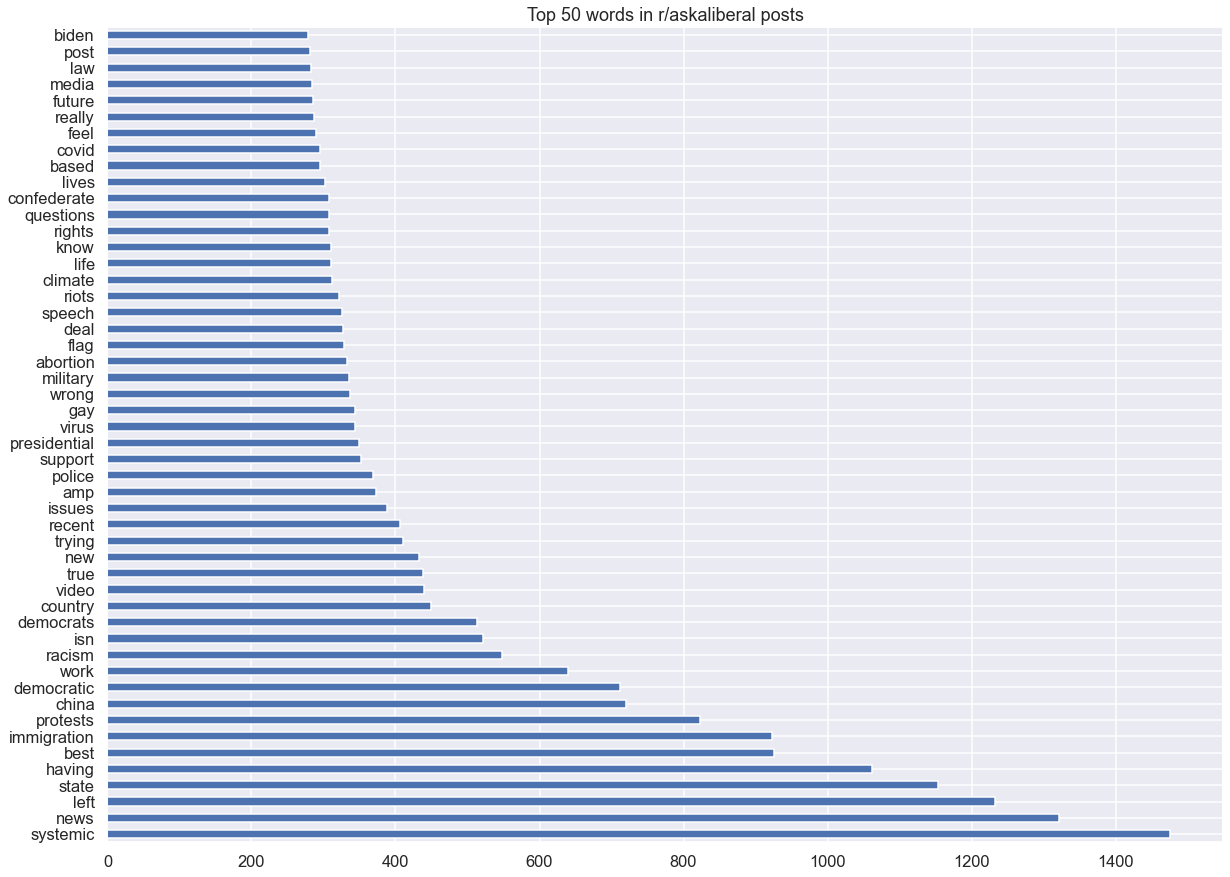

In [138]:
plt.figure(figsize=(20, 15))
self_text_lib.sum().sort_values(ascending = False).head(50).plot(kind = 'barh' 
                                                                 ).set_title("Top 50 words in r/askaliberal posts");
#Note: many antagonistic words

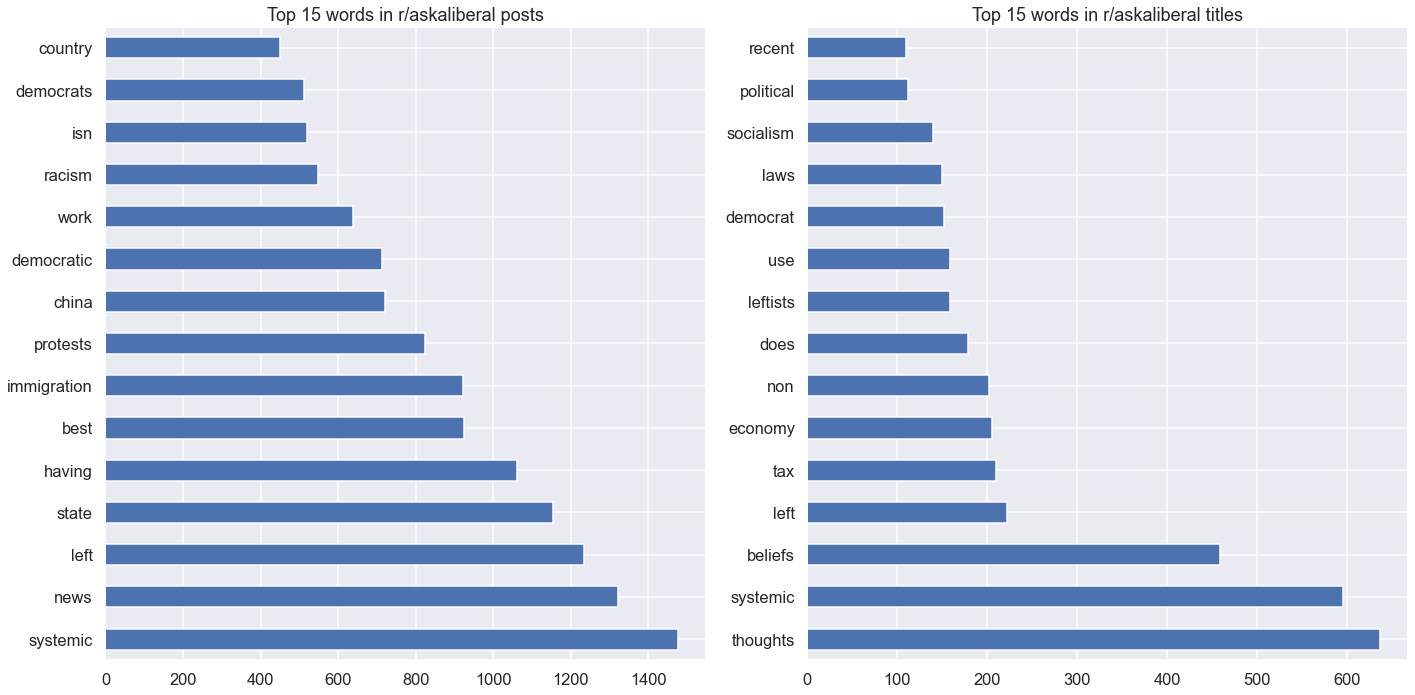

In [181]:
sns.set(style="darkgrid", context="talk")
fig, ax = plt.subplots(1, 2, figsize = (20,10))
self_text_lib.sum().sort_values(ascending = False).head(15).plot(kind = 'barh', 
                                                                 ax = ax[0]).set_title("Top 15 words in r/askaliberal posts");
title_text_lib.sum().sort_values(ascending = False).head(15).plot(kind = 'barh', 
                                                                  ax = ax[1]).set_title("Top 15 words in r/askaliberal titles");
plt.tight_layout()

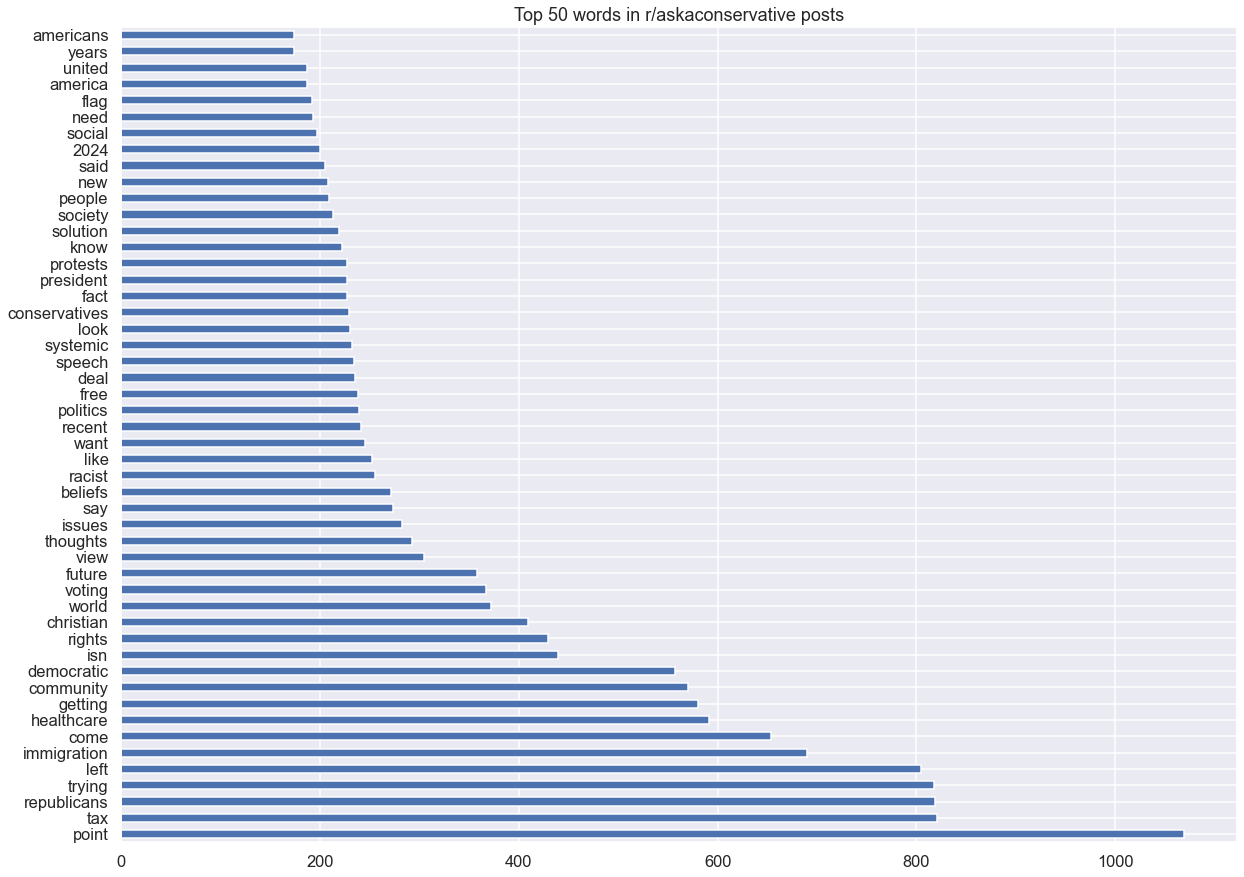

In [184]:
plt.figure(figsize=(20, 15))
self_text_cons.sum().sort_values(ascending = False).head(50).plot(kind = 'barh' 
                                                                 ).set_title("Top 50 words in r/askaconservative posts");
#Note: less antagonistic words

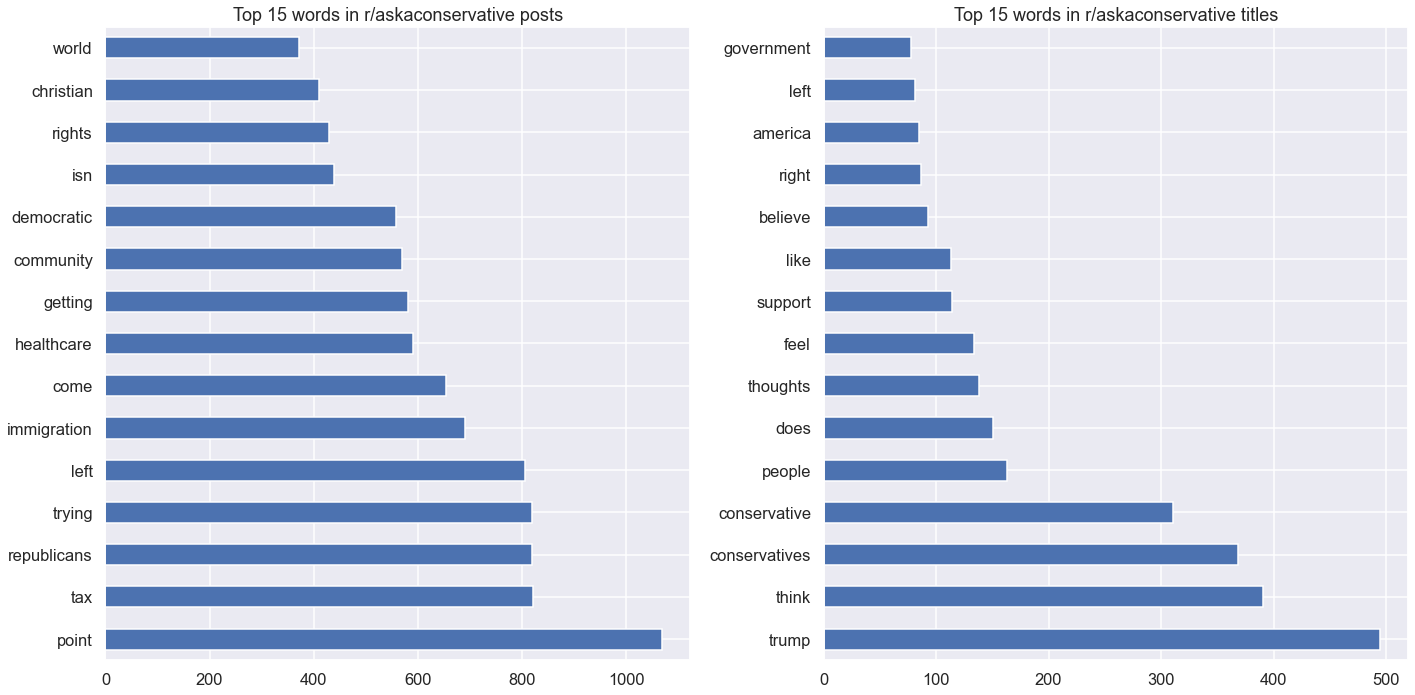

In [179]:
fig, ax = plt.subplots(1, 2, figsize = (20,10))
self_text_cons.sum().sort_values(ascending = False).head(15).plot(kind = 'barh', 
                                                                  ax = ax[0]).set_title("Top 15 words in r/askaconservative posts");
title_text_cons.sum().sort_values(ascending = False).head(15).plot(kind = 'barh', 
                                                                   ax = ax[1]).set_title("Top 15 words in r/askaconservative titles");
plt.tight_layout()

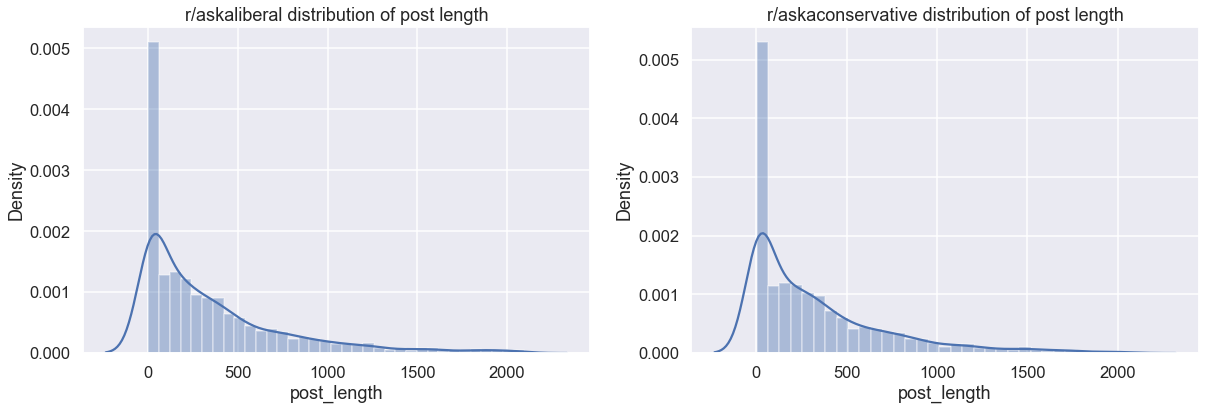

In [81]:
fig, ax = plt.subplots(1, 2, figsize = (20,6))
sns.cubehelix_palette(as_cmap=True)
sns.distplot(df_lib_trim['post_length'], ax = ax[0]).set_title("r/askaliberal distribution of post length");
sns.distplot(df_cons_trim['post_length'], ax = ax[1]).set_title("r/askaconservative distribution of post length");

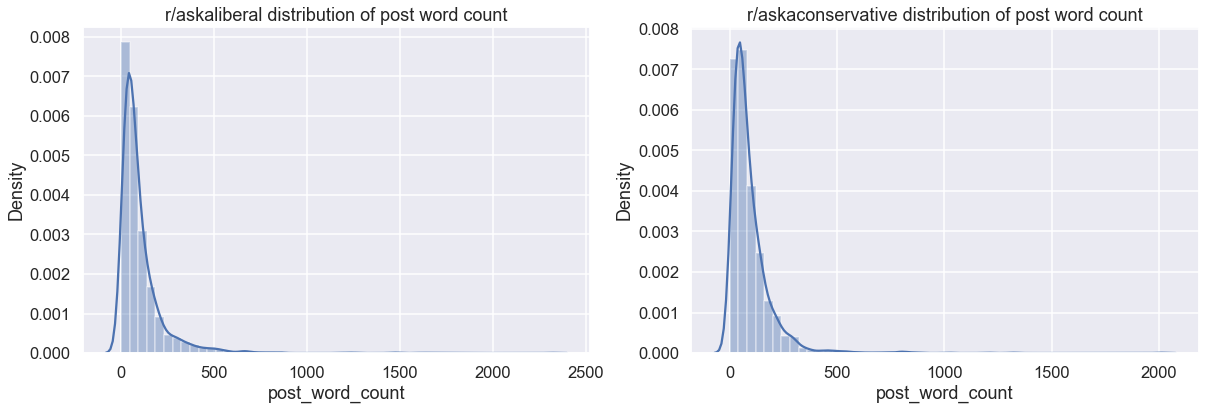

In [105]:
fig, ax = plt.subplots(1, 2, figsize = (20,6))
sns.cubehelix_palette(as_cmap=True)
sns.distplot(df_lib_trim['post_word_count'], ax = ax[0]).set_title("r/askaliberal distribution of post word count");
sns.distplot(df_cons_trim['post_word_count'], ax = ax[1]).set_title("r/askaconservative distribution of post word count");

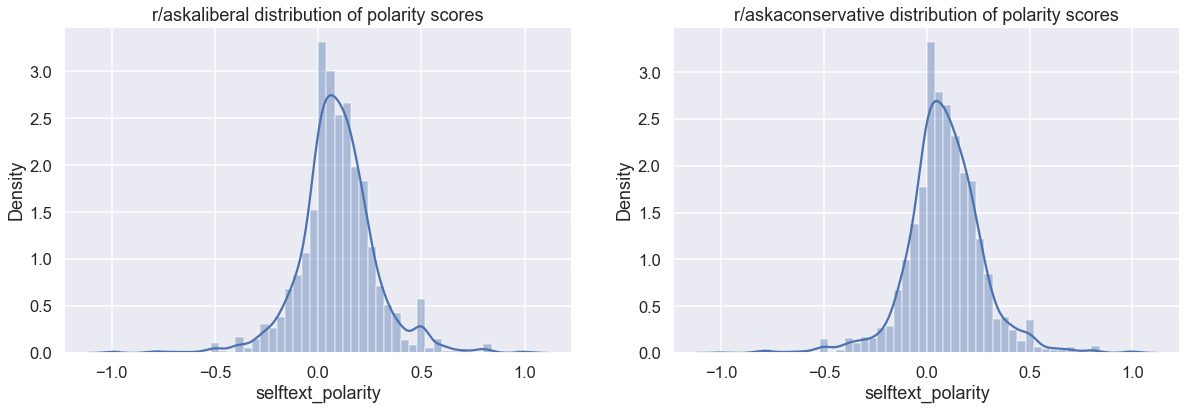

In [88]:
fig, ax = plt.subplots(1, 2, figsize = (20,6))
sns.cubehelix_palette(as_cmap=True)
sns.distplot(df_lib_trim['selftext_polarity'], ax = ax[0]).set_title("r/askaliberal distribution of polarity scores");
sns.distplot(df_cons_trim['selftext_polarity'], ax = ax[1]).set_title("r/askaconservative distribution of polarity scores");
#polarity slightly skewed to more polarizing for r/askaconservative

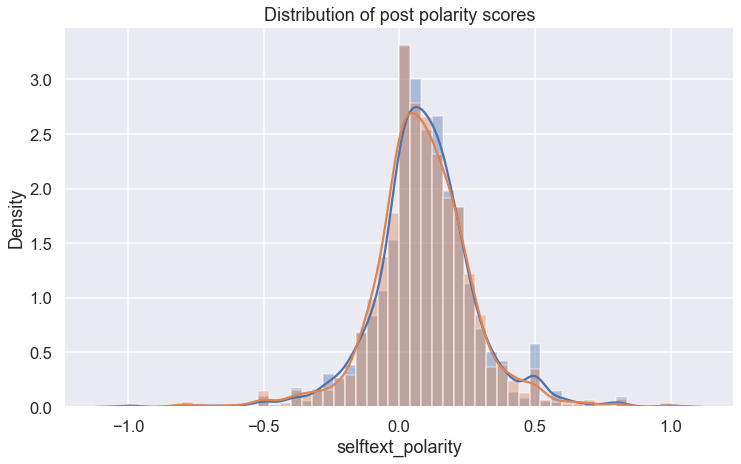

In [174]:
plt.figure(figsize=(12, 7))
sns.distplot(df_lib_trim['selftext_polarity']).set_title("Distribution of post polarity scores");
sns.distplot(df_cons_trim['selftext_polarity']).set_title("Distribution of post polarity scores");

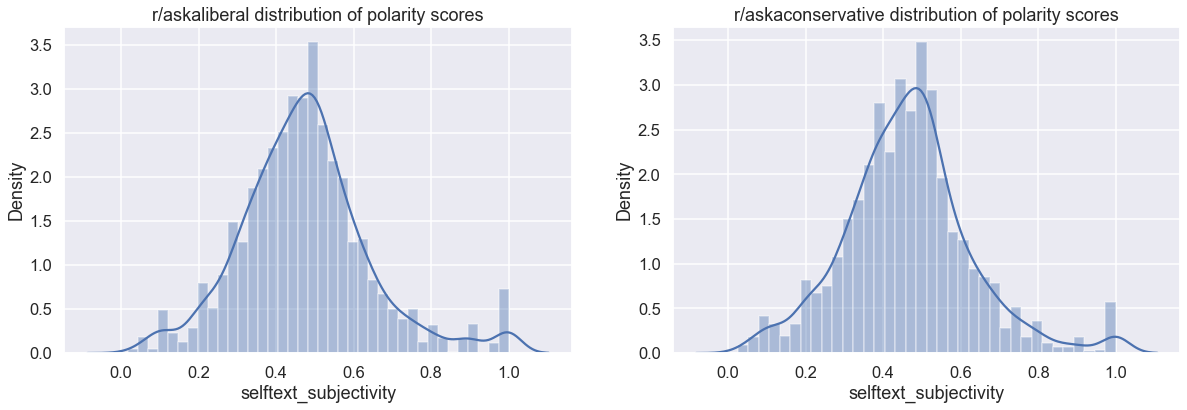

In [89]:
fig, ax = plt.subplots(1, 2, figsize = (20,6))
sns.cubehelix_palette(as_cmap=True)
sns.distplot(df_lib_trim['selftext_subjectivity'], ax = ax[0]).set_title("r/askaliberal distribution of polarity scores");
sns.distplot(df_cons_trim['selftext_subjectivity'], ax = ax[1]).set_title("r/askaconservative distribution of polarity scores");

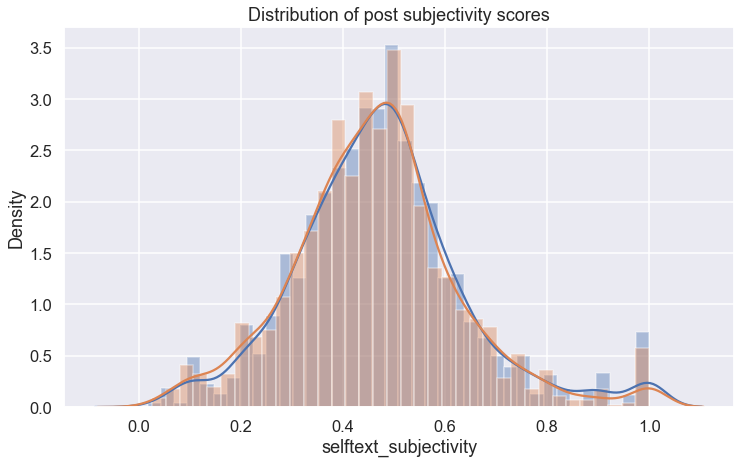

In [175]:
plt.figure(figsize=(12, 7))
sns.distplot(df_lib_trim['selftext_subjectivity']).set_title("Distribution of post subjectivity scores");
sns.distplot(df_cons_trim['selftext_subjectivity']).set_title("Distribution of post subjectivity scores");

#### Examining if time is a valuable feature

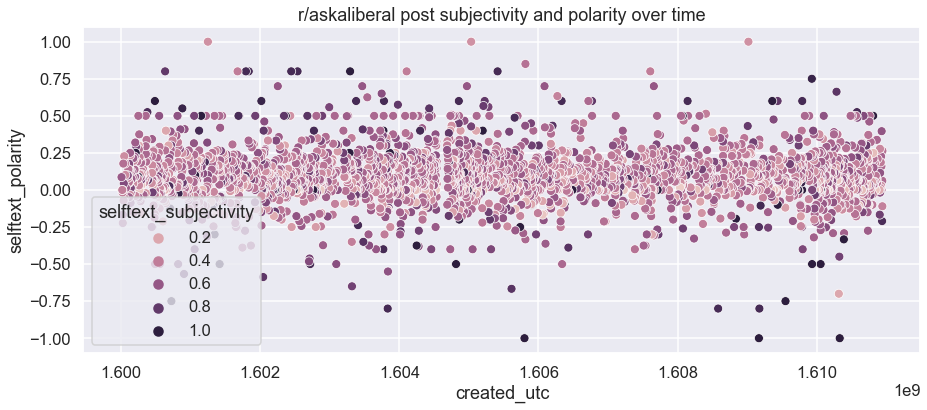

In [182]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x = df_lib['created_utc'], y = df_lib['selftext_polarity'], 
                hue = df_lib_trim['selftext_subjectivity']).set_title('r/askaliberal post subjectivity and polarity over time');

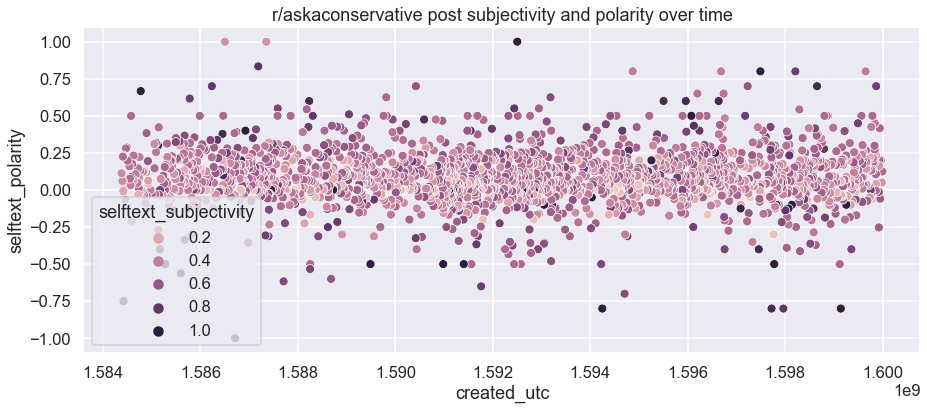

In [183]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x = df_cons['created_utc'], y = df_cons['selftext_polarity'], 
                hue = df_cons_trim['selftext_subjectivity']).set_title('r/askaconservative post subjectivity and polarity over time');

#### Inspecting Bi-Grams

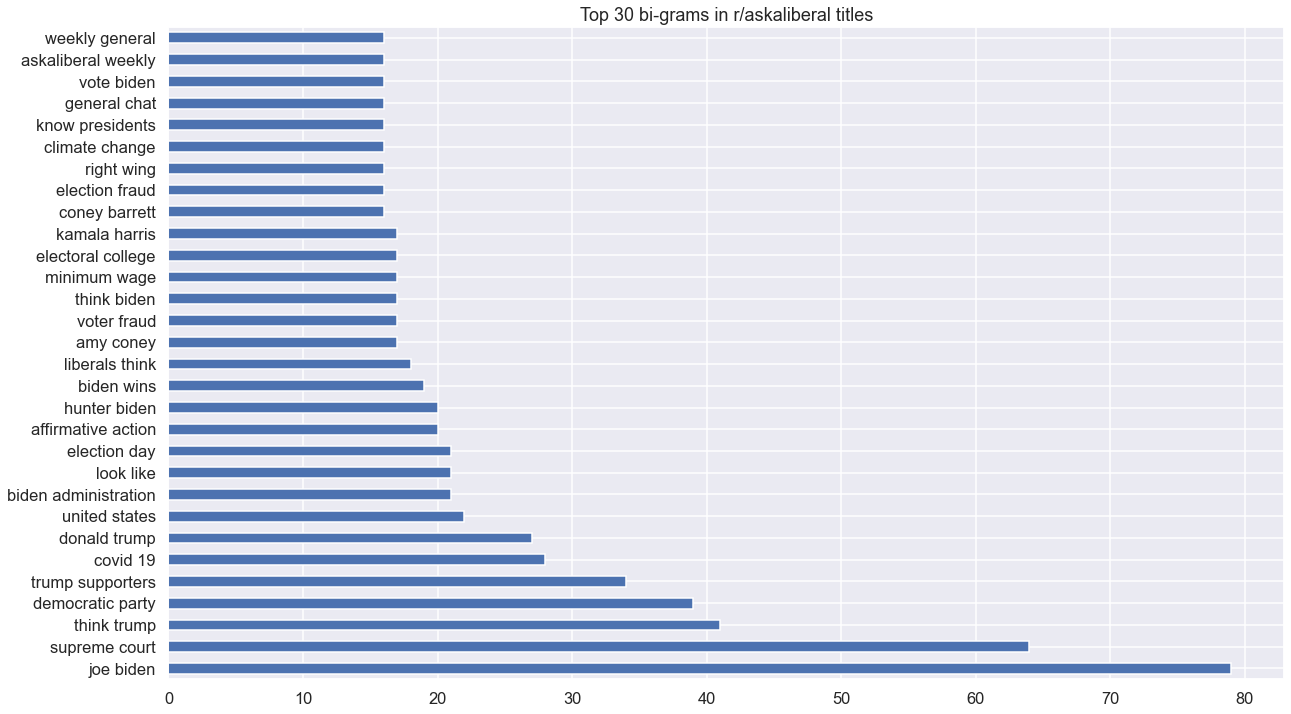

In [159]:
plt.figure(figsize=(20, 12))
title_text_lib_bigrams.sum().sort_values(ascending = False).head(30).plot(kind = 'barh' 
                            ).set_title("Top 30 bi-grams in r/askaliberal titles");

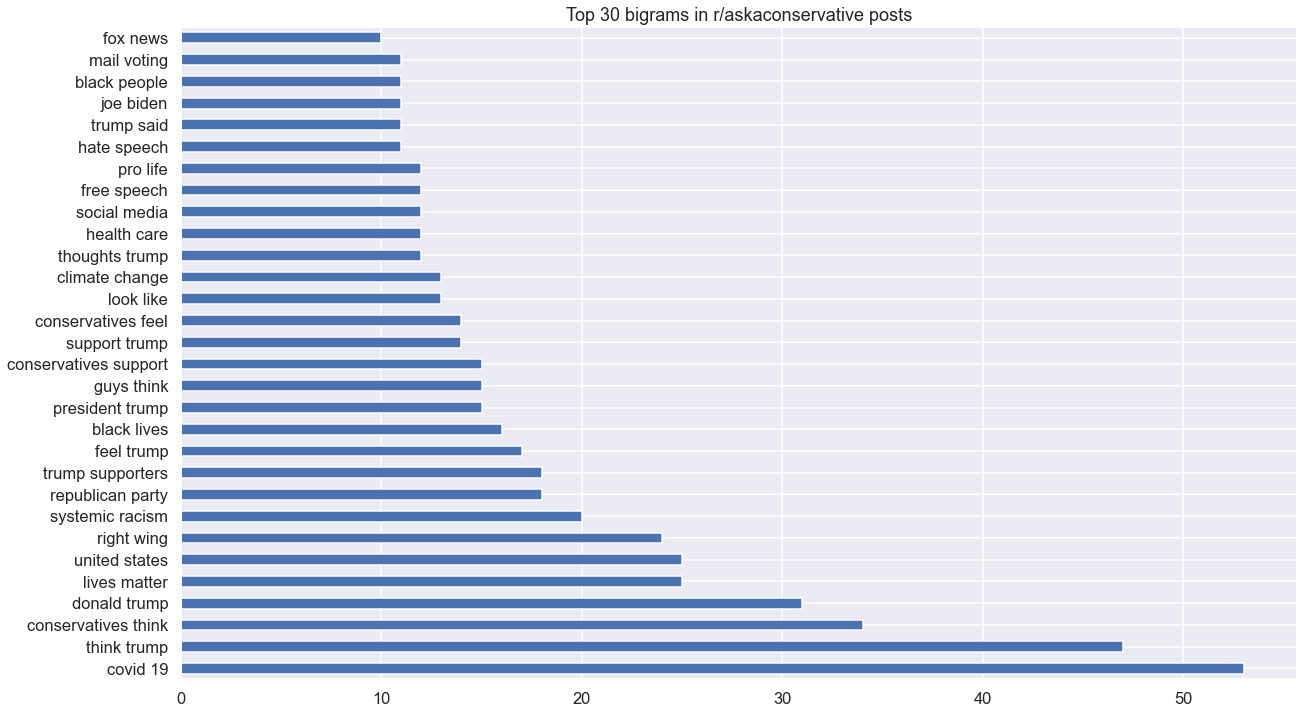

In [156]:
plt.figure(figsize=(20, 12))
title_text_cons_bigrams.sum().sort_values(ascending = False).head(30).plot(kind = 'barh' 
                            ).set_title("Top 30 bigrams in r/askaconservative posts");

#### Inspecting Tri-Grams

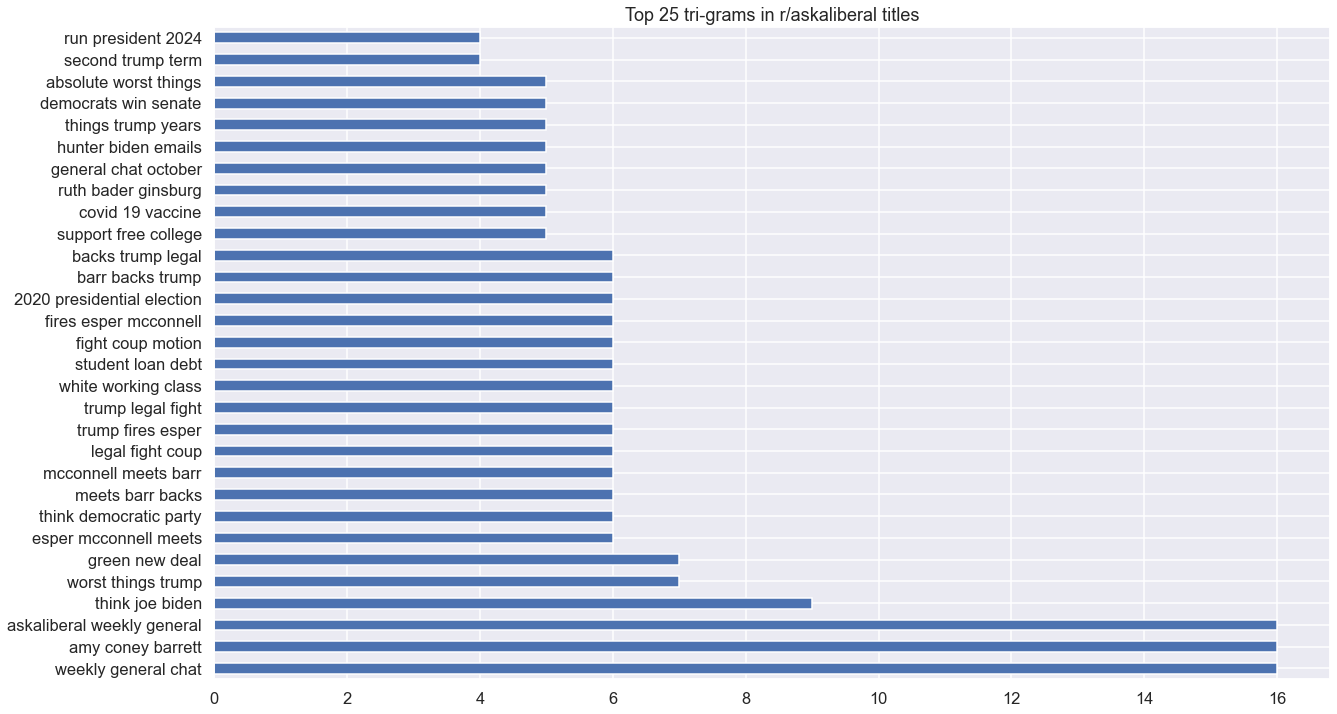

In [157]:
plt.figure(figsize=(20, 12))
title_text_lib_trigrams.sum().sort_values(ascending = False).head(30).plot(kind = 'barh' 
                            ).set_title("Top 25 tri-grams in r/askaliberal titles");

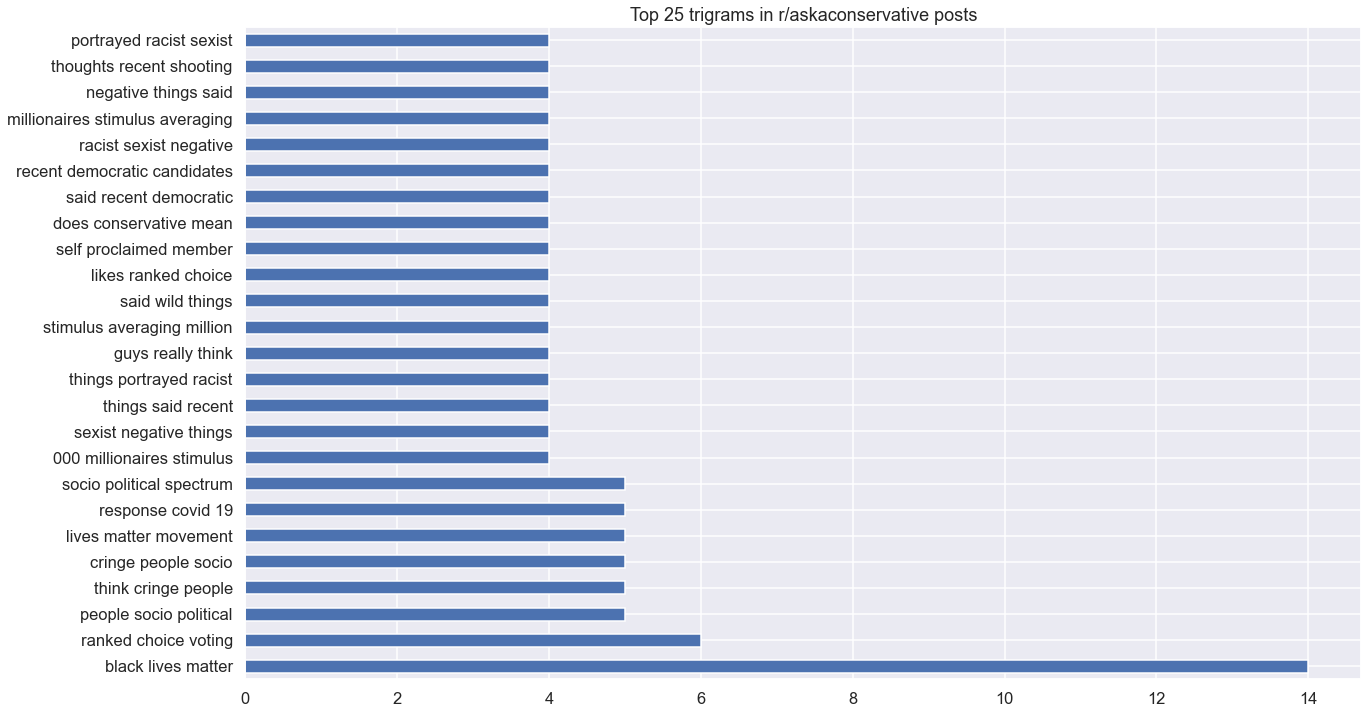

In [158]:
plt.figure(figsize=(20, 12))
title_text_cons_trigrams.sum().sort_values(ascending = False).head(25).plot(kind = 'barh' 
                            ).set_title("Top 25 trigrams in r/askaconservative posts");

In [186]:
df_corr = df

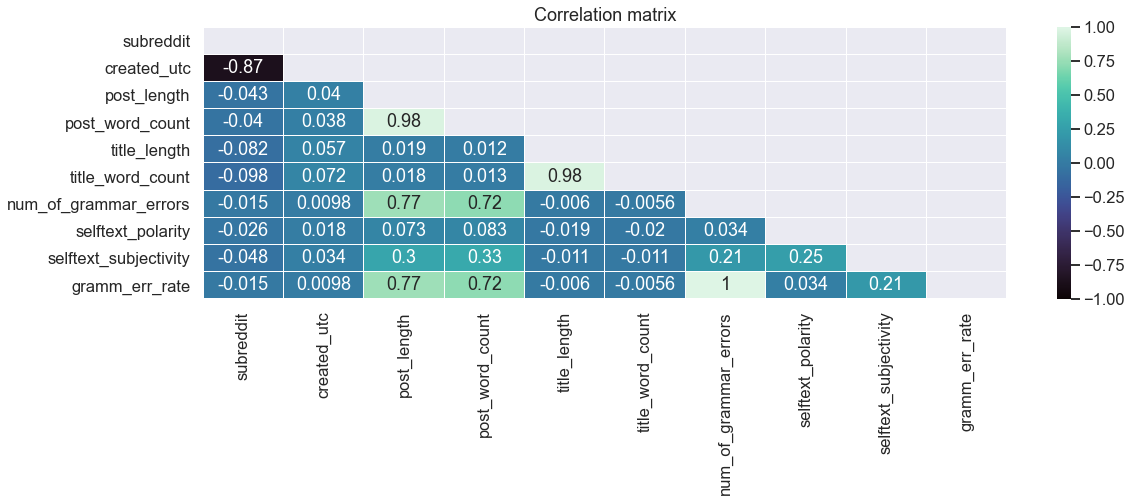

In [187]:
df_corr['subreddit'] = np.where(df_corr['subreddit'] == 'AskALiberal', 0, 1) 

import matplotlib.pyplot as plt
mask = np.zeros_like(df_corr.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18, 5))
sns.heatmap(
    df_corr.corr(),
    cmap='mako',
    annot=True,
    mask=mask,
    vmin=-1.,
    vmax=1.,
    linewidths=.01
)
plt.title('Correlation matrix');
# no major correlations and similar top words may make separation difficult

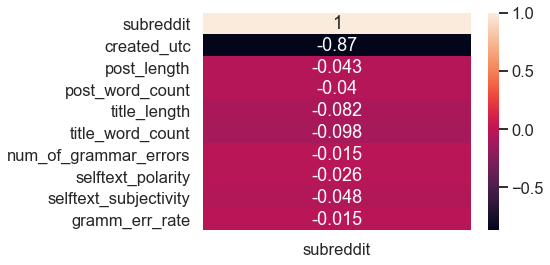

In [188]:
# no features standing out
sns.heatmap(df_corr.corr()[['subreddit']], annot = True);

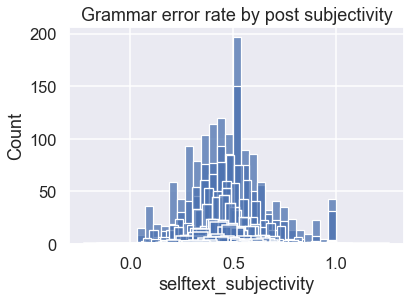

In [169]:
df_x = df[df.gramm_err_rate != 0]
df_x = df[df.selftext_subjectivity != 0]
for group in df_x.groupby('gramm_err_rate')['selftext_subjectivity']:
    sns.histplot(group[1]);
plt.title('Grammar error rate by post subjectivity, where vaues not equal to zero');

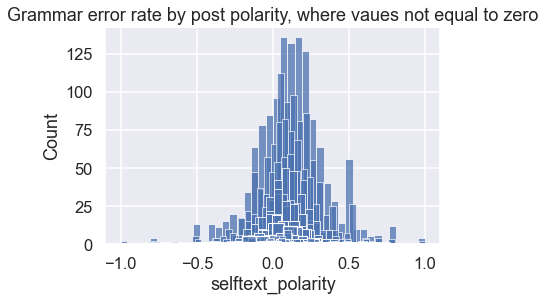

In [185]:
df_y = df[df.gramm_err_rate != 0]
df_y = df[df.selftext_polarity != 0]
for group in df_y.groupby('gramm_err_rate')['selftext_polarity']:
    sns.histplot(group[1]);
plt.title('Grammar error rate by post polarity, where vaues not equal to zero');

### Note: Evaluation visuals can be found in model_classification_p3_csinnott.ipynb